# <code style="font-weight:bold"> Phase 2 </code>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the provided data file
file_path = 'data_phase1.csv'
data = pd.read_csv(file_path)
data

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
1,30 Ari B b,30 Ari B,1,4,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.023,5.822,0.021,-0.021,6.96085,0.000512,-0.000512,2018-09-04,2017-03,2018-09-06
2,4 UMa b,4 UMa,1,1,1,Radial Velocity,2006,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.023,1.734,0.218,-0.218,4.23773,0.004729,-0.004729,2014-05-14,2007-09,2014-05-14
3,42 Dra b,42 Dra,1,2,1,Radial Velocity,2008,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.023,2.085,0.216,-0.216,4.43216,0.006238,-0.006238,2014-05-14,2009-06,2014-05-14
4,55 Cnc f,55 Cnc,1,2,5,Radial Velocity,2007,Multiple Observatories,Published Confirmed,0,...,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,2021-02-05,2018-10,2021-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,tau Cet e,tau Cet,1,1,4,Radial Velocity,2017,Multiple Observatories,Published Confirmed,0,...,-0.023,1.794,0.274,-0.274,3.24854,0.010399,-0.010399,2017-08-14,2017-10,2017-08-17
201,tau Gem b,tau Gem,1,1,1,Radial Velocity,2013,Lick Observatory,Published Confirmed,0,...,-0.023,1.681,0.254,-0.254,4.03996,0.006709,-0.006709,2014-05-14,2013-07,2014-05-14
202,ups And c,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
203,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10


In [2]:
# Identifying relevant columns for planetary and stellar parameters
# This is based on common parameters of interest in astrophysics

# Potential planetary parameters
planet_params = ['pl_bmasse', 'pl_radj', 'pl_orbper', 'pl_orbeccen']

# Potential stellar parameters
star_params = ['st_mass', 'st_rad', 'st_teff', 'st_lum', 'st_met', 'st_metratio', 'st_logg']

# Selecting relevant columns from the dataset
selected_columns = planet_params + star_params
data_selected = data[selected_columns]

# Removing rows with missing values for simplicity
data_clean = data_selected.dropna()

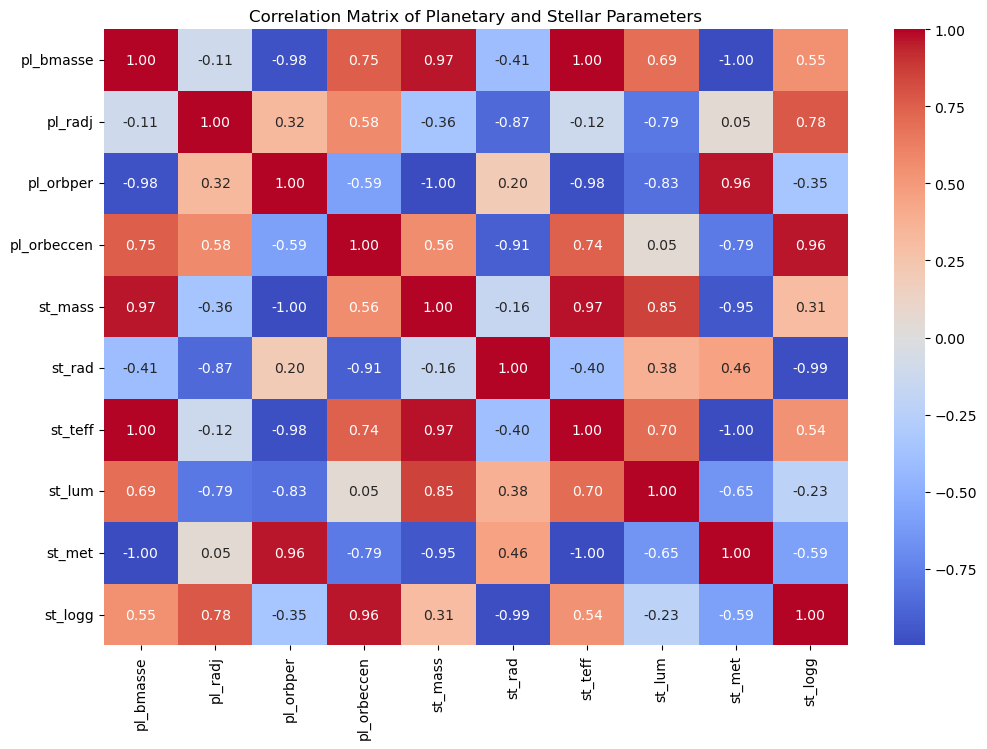

In [3]:
# Excluding the 'st_metratio' column as it contains non-numeric data
data_clean_excluded = data_clean.drop(columns=['st_metratio'])

# Recalculating the correlation matrix without the 'st_metratio' column
correlation_matrix_excluded = data_clean_excluded.corr()

# Plotting the new correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_excluded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Planetary and Stellar Parameters")
plt.show()

In [4]:
# Extracting the specific columns of interest
columns_of_interest = ['pl_bmasse', 'pl_orbeccen', 'st_mass']
data_selected = data[columns_of_interest]

# Checking for missing values in these columns
missing_values = data_selected.isnull().sum()

missing_values

pl_bmasse       9
pl_orbeccen    15
st_mass         4
dtype: int64

In [5]:
data_selected

,pl_bmasse,pl_orbeccen,st_mass
0,1525.50000,0.0000,2.20
1,4392.41060,0.2900,1.93
2,2256.50000,0.4320,1.23
3,1233.13000,0.3800,0.98
4,47.80000,0.0800,0.91
...,...,...,...
200,3.93000,0.1800,0.78
201,6547.00000,0.0310,2.30
202,629.59500,0.2596,1.30
203,162.09249,0.3200,1.48


Missing values in each column:
 pl_bmasse       9
pl_orbeccen    15
st_mass         4
dtype: int64


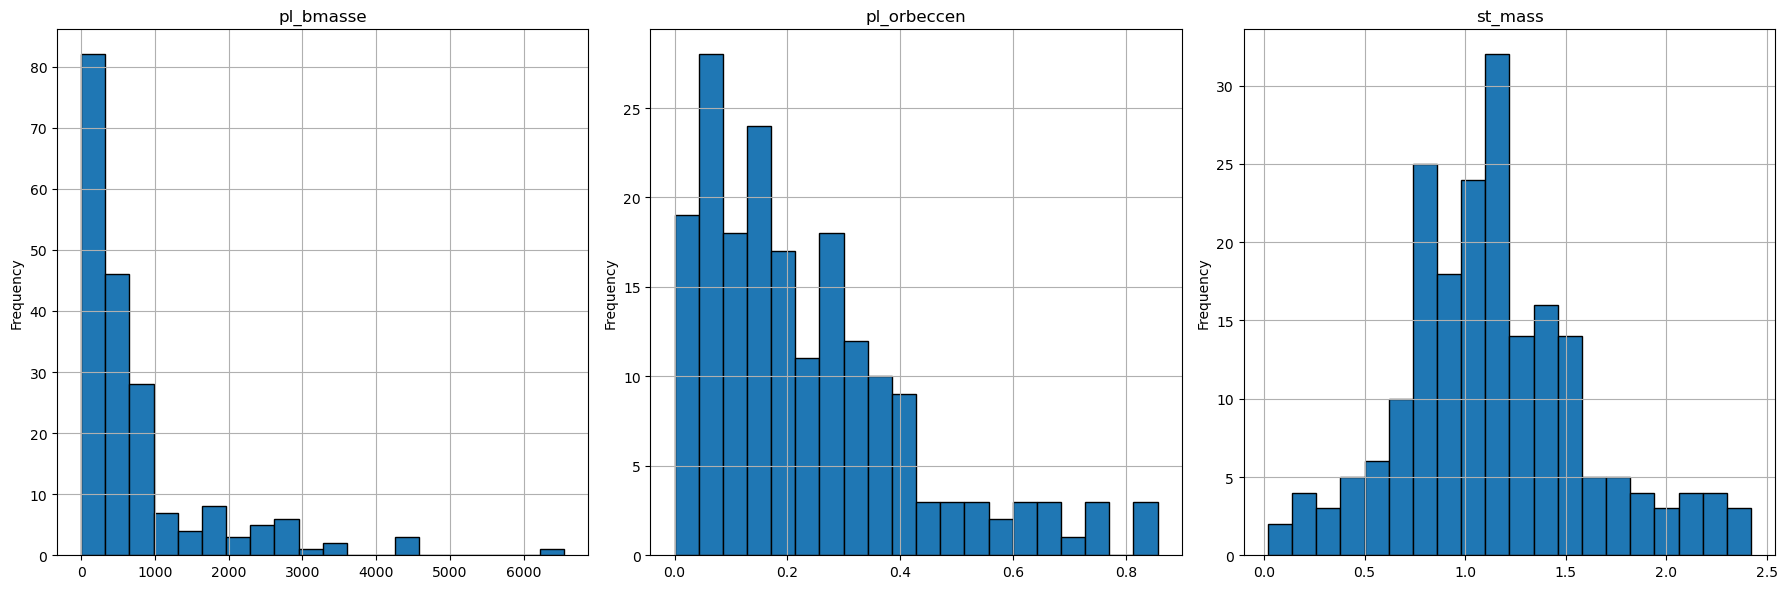

In [6]:
import matplotlib.pyplot as plt

# Extracting the specific columns of interest
columns_of_interest = ['pl_bmasse', 'pl_orbeccen', 'st_mass']
data_selected = data[columns_of_interest]

# Checking for missing values in these columns
missing_values = data_selected.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Plotting histograms for each column to inspect their distributions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(columns_of_interest):
    ax = axes[i]
    # Drop missing values for each column before plotting
    data_selected[col].dropna().hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

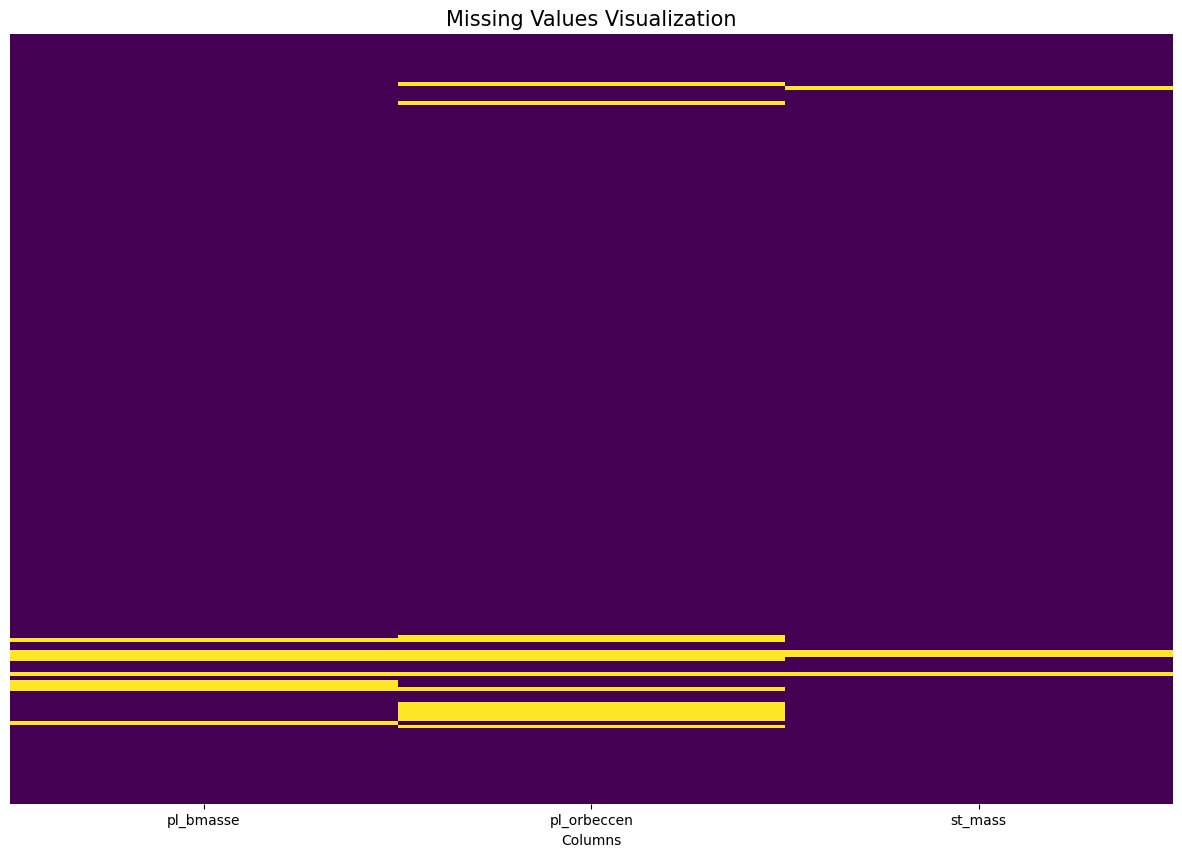

In [7]:
# Importing required libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap to visualize missing values
plt.figure(figsize=(15, 10))
sns.heatmap(data_selected.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Visualization', fontsize=15)
plt.xlabel('Columns')
plt.show()

In [8]:
from sklearn.impute import SimpleImputer

# Creating imputers for mean and median imputation
median_imputer = SimpleImputer(strategy='median')

# Creating a new DataFrame for imputation to avoid any confusion
data_imputed = data_selected.copy()

# Imputing missing values
for col in ['pl_bmasse', 'pl_orbeccen', 'st_mass']:
    data_imputed.loc[:, col] = median_imputer.fit_transform(data_imputed[[col]])

# Verifying the imputation
imputed_data_head_corrected = data_imputed.head()
imputed_missing_values_corrected = data_imputed.isnull().sum()

imputed_data_head_corrected, imputed_missing_values_corrected

(   pl_bmasse  pl_orbeccen  st_mass
 0  1525.5000        0.000     2.20
 1  4392.4106        0.290     1.93
 2  2256.5000        0.432     1.23
 3  1233.1300        0.380     0.98
 4    47.8000        0.080     0.91,
 pl_bmasse      0
 pl_orbeccen    0
 st_mass        0
 dtype: int64)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_imputed)

In [10]:
data_standardized

array([[ 0.81663011, -1.27873562,  2.34446111],
       [ 3.79455974,  0.32348058,  1.75091986],
       [ 1.57593756,  1.10801403,  0.21210923],
       [ 0.5129383 ,  0.82072009, -0.337466  ],
       [-0.71829274, -0.83674495, -0.49134706],
       [ 0.28843882, -1.12956377,  0.58582038],
       [-0.42460052,  0.32348058, -1.41463344],
       [-0.40150261,  0.15773408, -0.07366989],
       [-0.3189587 , -0.61574961, -0.71117715],
       [-0.46751842, -0.17375893, -0.86505821],
       [-0.53024579,  0.21298291, -0.49134706],
       [-0.65991644, -0.22900777, -0.86505821],
       [-0.69724819,  0.61077452, -1.74437858],
       [-0.75691251, -0.22624533, -2.14007274],
       [-0.73740527,  0.78204591, -0.07366989],
       [-0.75242736,  0.95331729, -1.37066742],
       [-0.75703716,  0.48922708, -0.99695627],
       [-0.18927047, -0.89199378, -1.5685145 ],
       [-0.74571506, -0.22624533, -1.0629053 ],
       [-0.68276865, -0.8201703 , -1.37066742],
       [-0.76316563, -0.83674495, -1.766

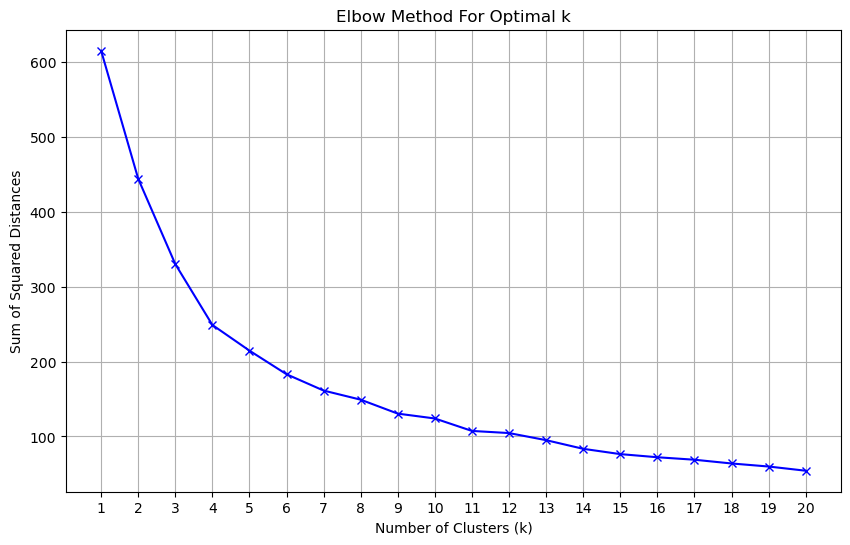

In [11]:
# Implementing the Elbow Method
sum_of_squared_distances = []
K = range(1, 21)  # You can adjust this range as needed
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans = kmeans.fit(data_standardized)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)  # This ensures that all cluster numbers are shown in the x-axis
plt.grid(True)
plt.show()

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage

# Optimal number of clusters
n_clusters = 4

# K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(data_standardized)

# Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hierarchical_clusters = hierarchical_clustering.fit_predict(data_standardized)

# Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_clusters = gmm.fit_predict(data_standardized)

# Co-Association Matrix for Ensemble Learning
n_samples = data_standardized.shape[0]
co_association_matrix = np.zeros((n_samples, n_samples))

# Increment co-association matrix based on clustering results
for clusters in [kmeans_clusters, hierarchical_clusters, gmm_clusters]:
    for i in range(n_samples):
        for j in range(n_samples):
            if clusters[i] == clusters[j]:
                co_association_matrix[i, j] += 1

# Normalize the co-association matrix
co_association_matrix /= 3  # Normalize by the number of clustering methods

# Convert the co-association matrix to a dissimilarity matrix
dissimilarity_matrix = 1 - co_association_matrix

# Apply Hierarchical Clustering to the dissimilarity matrix
linked = linkage(squareform(dissimilarity_matrix), method='ward')
ensemble_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
ensemble_clusters = ensemble_clustering.fit_predict(dissimilarity_matrix)

/Users/agastya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/agastya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/agastya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/agastya/anaconda3/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', me

In [13]:
# Adding the cluster labels to the planetary data
cluster_labels = {
    "KMeans": kmeans_clusters,
    "Hierarchical": hierarchical_clusters,
    #"DBSCAN": dbscan_clusters,
    "GMM": gmm_clusters,
    "Ensemble": ensemble_clusters
}

# Creating a DataFrame to hold the planetary data along with the cluster labels
clustered_data = data.copy()

# Adding the cluster labels and counting the number of planets in each cluster for each technique
for method, labels in cluster_labels.items():
    clustered_data[method] = labels
    cluster_counts = clustered_data[method].value_counts()
    print(f"Cluster Counts for {method}:")
    print(cluster_counts)
    print("\n")

# Optional: To save the clustered data to a CSV file
# clustered_planetary_data.to_csv('clustered_planetary_data.csv', index=False)

Cluster Counts for KMeans:
KMeans
0    91
1    60
2    37
3    17
Name: count, dtype: int64


Cluster Counts for Hierarchical:
Hierarchical
0    119
3     43
2     22
1     21
Name: count, dtype: int64


Cluster Counts for GMM:
GMM
0    111
2     35
1     32
3     27
Name: count, dtype: int64


Cluster Counts for Ensemble:
Ensemble
2    78
0    59
3    36
1    32
Name: count, dtype: int64




In [14]:
import pandas as pd

# Assuming 'clustered_data' is the DataFrame with the cluster labels
methods = ["KMeans", "Hierarchical", "GMM", "Ensemble"]  # List your methods here
cluster_stats = []

# Collecting cluster counts for each method
for method in methods:
    cluster_counts = clustered_data[method].value_counts().sort_index()
    cluster_stats.append(cluster_counts)

# Creating a DataFrame to display the statistics
stats_df = pd.DataFrame(cluster_stats, index=methods)

# Optional: Filling NaNs with 0 if some clusters don't appear in certain methods
stats_df = stats_df.fillna(0).astype(int)

# Display the DataFrame
stats_df

# Optional: To save the stats to a CSV file
# stats_df.to_csv('cluster_stats.csv')

,0,1,2,3
KMeans,91,60,37,17
Hierarchical,119,21,22,43
GMM,111,32,35,27
Ensemble,59,32,78,36


In [15]:
clustered_data

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,KMeans,Hierarchical,GMM,Ensemble
0,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14,1,3,1,3
1,30 Ari B b,30 Ari B,1,4,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,6.96085,0.000512,-0.000512,2018-09-04,2017-03,2018-09-06,3,1,3,1
2,4 UMa b,4 UMa,1,1,1,Radial Velocity,2006,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,4.23773,0.004729,-0.004729,2014-05-14,2007-09,2014-05-14,3,2,3,1
3,42 Dra b,42 Dra,1,2,1,Radial Velocity,2008,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,4.43216,0.006238,-0.006238,2014-05-14,2009-06,2014-05-14,2,0,2,0
4,55 Cnc f,55 Cnc,1,2,5,Radial Velocity,2007,Multiple Observatories,Published Confirmed,0,...,5.72973,0.000852,-0.000852,2021-02-05,2018-10,2021-02-11,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,tau Cet e,tau Cet,1,1,4,Radial Velocity,2017,Multiple Observatories,Published Confirmed,0,...,3.24854,0.010399,-0.010399,2017-08-14,2017-10,2017-08-17,0,0,0,2
201,tau Gem b,tau Gem,1,1,1,Radial Velocity,2013,Lick Observatory,Published Confirmed,0,...,4.03996,0.006709,-0.006709,2014-05-14,2013-07,2014-05-14,3,1,3,1
202,ups And c,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31,1,0,2,0
203,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10,1,0,0,0


In [16]:
# Earth's data - replace with actual values
earth_data = {'pl_bmasse': [1], 'pl_orbeccen': [0.0167], 'st_mass': [1]}
earth_df = pd.DataFrame(earth_data)
earth_df_standardized = scaler.transform(earth_df)

# Append Earth's data to the standardized dataset
data_standardized_with_earth = np.vstack([data_standardized, earth_df_standardized])

# Predicting the cluster for Earth using KMeans, Hierarchical, and GMM
earth_clusters = {
    'KMeans': kmeans.predict(earth_df_standardized)[0],
    'Hierarchical': hierarchical_clustering.labels_[np.argmin(np.sum(np.square(data_standardized - earth_df_standardized), axis=1))],
    'GMM': gmm.predict(earth_df_standardized)[0]
}

# Re-calculate the co-association matrix, including Earth
new_co_association_matrix = np.zeros((n_samples + 1, n_samples + 1))

# Include Earth in the clustering
new_kmeans_clusters = np.append(kmeans_clusters, kmeans.predict(earth_df_standardized))
new_hierarchical_clusters = np.append(hierarchical_clusters, hierarchical_clustering.labels_[np.argmin(np.sum(np.square(data_standardized - earth_df_standardized), axis=1))])
new_gmm_clusters = np.append(gmm_clusters, gmm.predict(earth_df_standardized))

for clusters in [new_kmeans_clusters, new_hierarchical_clusters, new_gmm_clusters]:
    for i in range(n_samples + 1):
        for j in range(n_samples + 1):
            if clusters[i] == clusters[j]:
                new_co_association_matrix[i, j] += 1

# Normalize the new co-association matrix
new_co_association_matrix /= 3

# Convert the new co-association matrix to a dissimilarity matrix
new_dissimilarity_matrix = 1 - new_co_association_matrix

# Apply Hierarchical Clustering to the new dissimilarity matrix
new_linked = linkage(squareform(new_dissimilarity_matrix), method='ward')
new_ensemble_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
new_ensemble_clusters = new_ensemble_clustering.fit_predict(new_dissimilarity_matrix)

# Get Earth's cluster for the ensemble method
earth_clusters['Ensemble'] = new_ensemble_clusters[-1]

# Output Earth's clusters
print(earth_clusters)

{'KMeans': 0, 'Hierarchical': 0, 'GMM': 0, 'Ensemble': 2}


/Users/agastya/anaconda3/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [17]:
 # Extracting the elements belonging to cluster 2 from the ensemble clustering
cluster_elements_0 = clustered_data[clustered_data['Ensemble'] == 2]

# Getting the corresponding rows from the original data
data_phase2 = data.loc[cluster_elements_0.index]

In [18]:
#pl_bmasse  pl_orbeccen  st_teff  st_mass

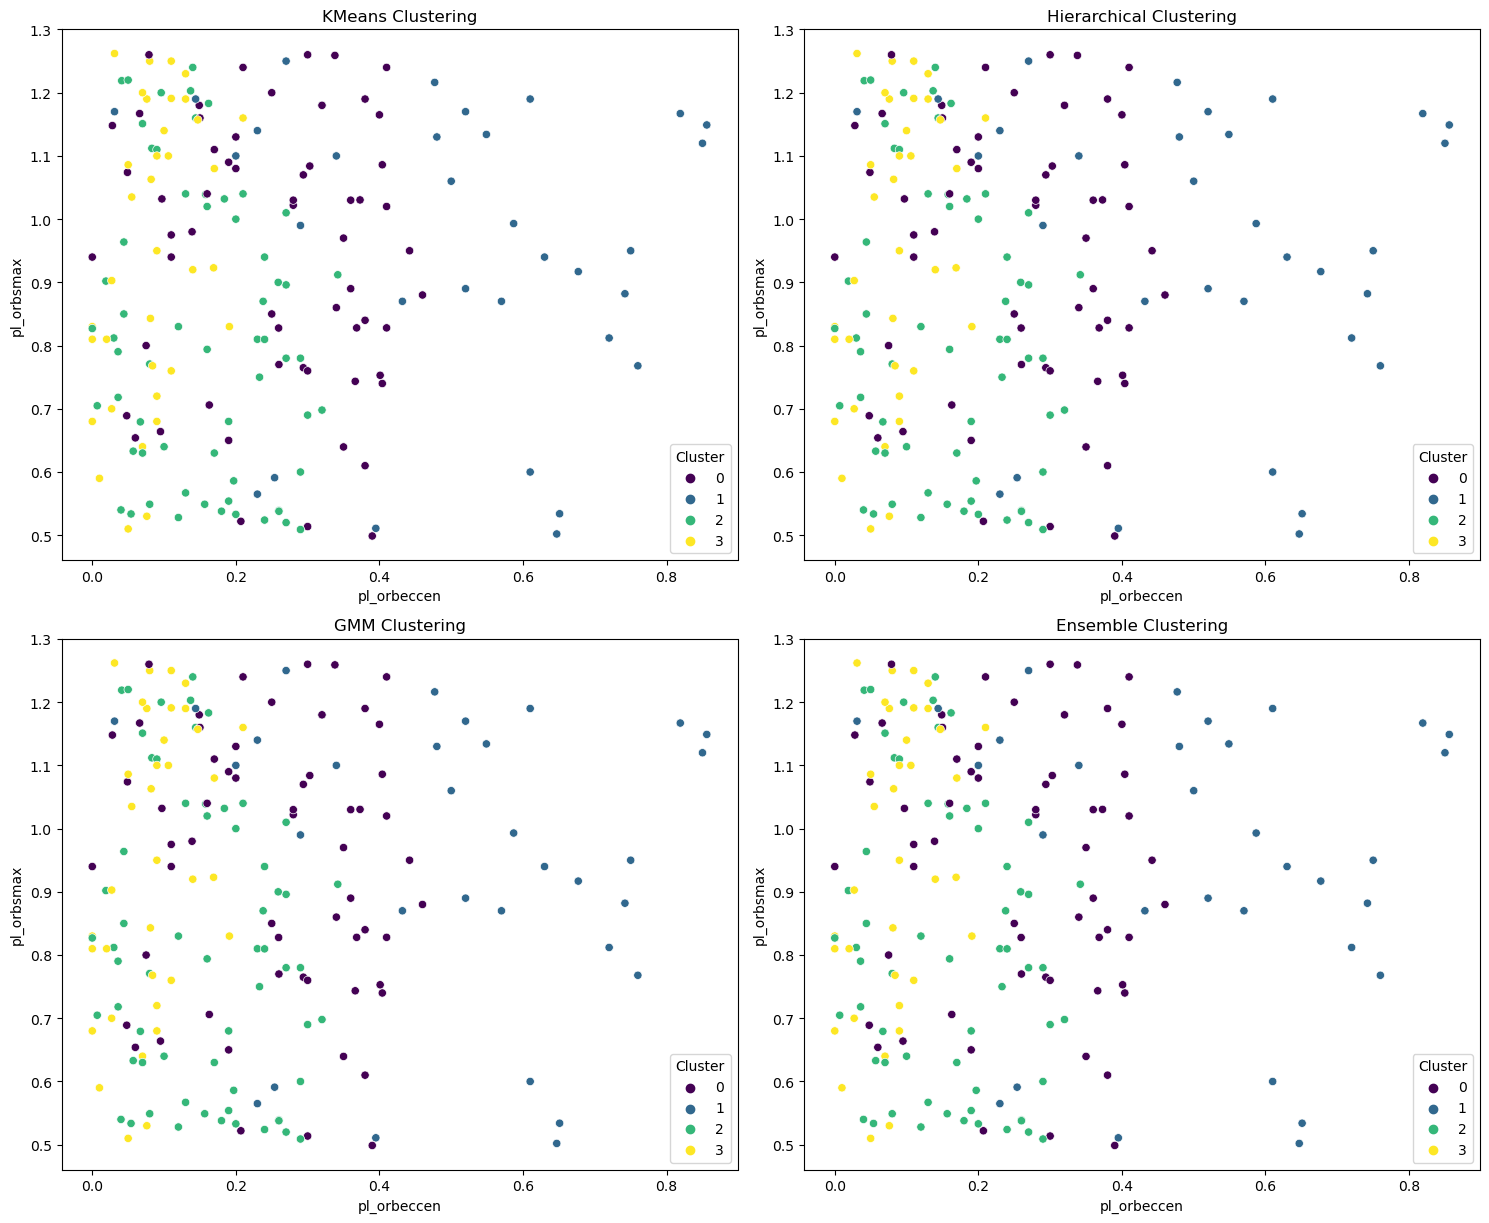

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features for the scatter plot
feature_x = 'pl_orbeccen'  # Replace with your actual feature name
feature_y = 'pl_orbsmax'    # Replace with your actual feature name

clustering_methods = [
    ('KMeans Clustering', kmeans_clusters),
    ('Hierarchical Clustering', hierarchical_clusters),
    #('DBSCAN Clustering', dbscan_clusters),
    ('GMM Clustering', gmm_clusters),
    ('Ensemble Clustering', ensemble_clusters),
]

plt.figure(figsize=(15, 18))

for idx, (title, clusters) in enumerate(clustering_methods, start=1):
    plt.subplot(3, 2, idx)
    sns.scatterplot(data=clustered_data, x=feature_x, y=feature_y, hue=method, palette='viridis')
    plt.title(title)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

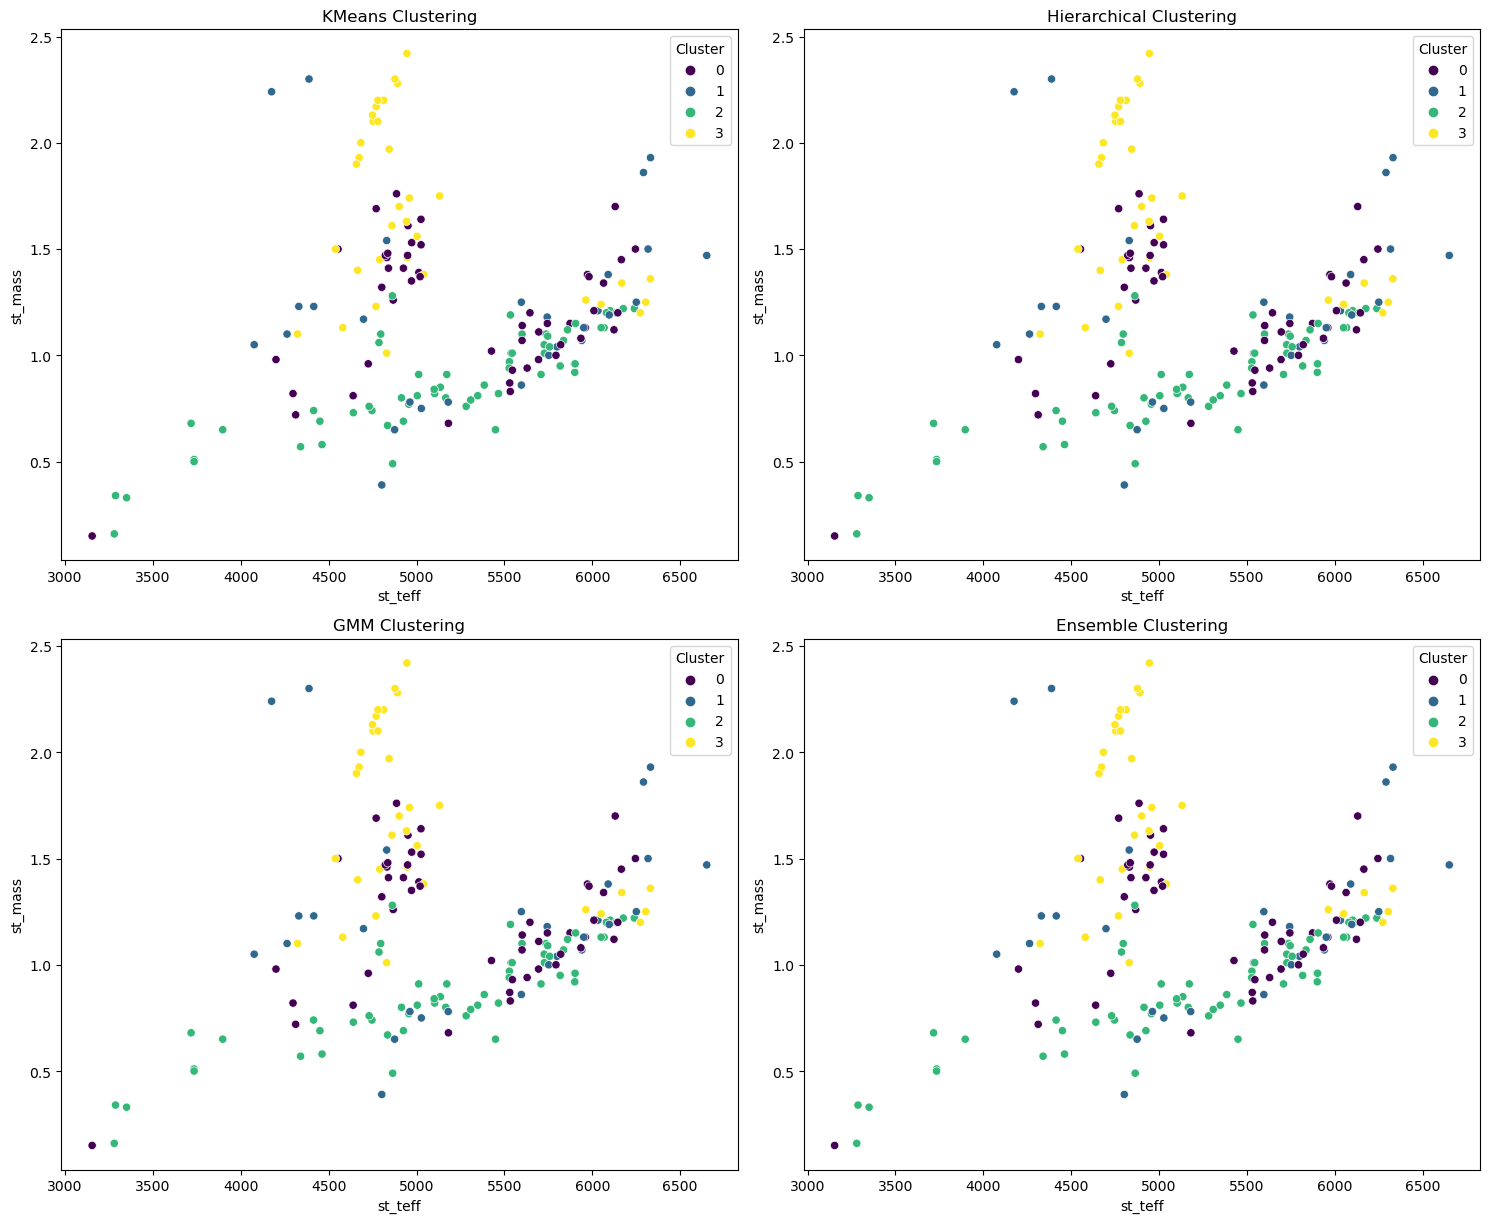

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features for the scatter plot
feature_x = 'st_teff'  # Replace with your actual feature name
feature_y = 'st_mass'    # Replace with your actual feature name

clustering_methods = [
    ('KMeans Clustering', kmeans_clusters),
    ('Hierarchical Clustering', hierarchical_clusters),
    #('DBSCAN Clustering', dbscan_clusters),
    ('GMM Clustering', gmm_clusters),
    ('Ensemble Clustering', ensemble_clusters),
]

plt.figure(figsize=(15, 18))

for idx, (title, clusters) in enumerate(clustering_methods, start=1):
    plt.subplot(3, 2, idx)
    sns.scatterplot(data=clustered_data, x=feature_x, y=feature_y, hue=method, palette='viridis')
    plt.title(title)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

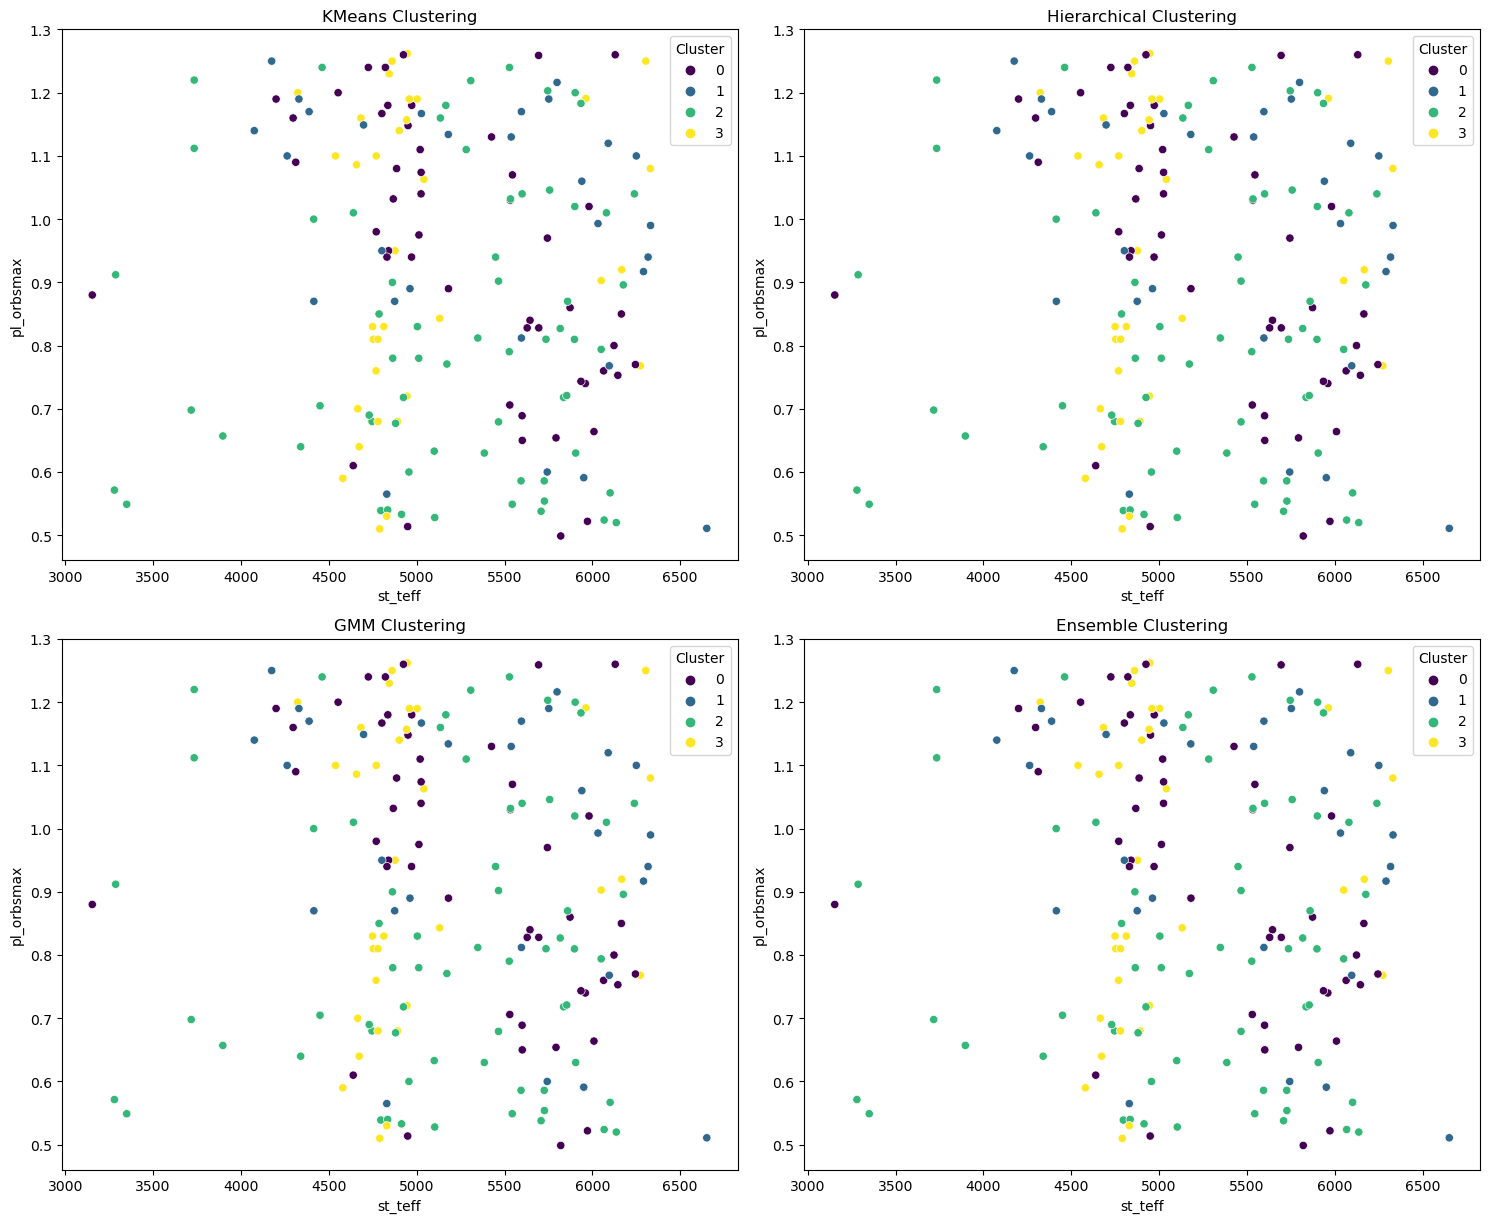

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features for the scatter plot
feature_x = 'st_teff'  # Replace with your actual feature name
feature_y = 'pl_orbsmax'    # Replace with your actual feature name

clustering_methods = [
    ('KMeans Clustering', kmeans_clusters),
    ('Hierarchical Clustering', hierarchical_clusters),
    #('DBSCAN Clustering', dbscan_clusters),
    ('GMM Clustering', gmm_clusters),
    ('Ensemble Clustering', ensemble_clusters),
]

plt.figure(figsize=(15, 18))

for idx, (title, clusters) in enumerate(clustering_methods, start=1):
    plt.subplot(3, 2, idx)
    sns.scatterplot(data=clustered_data, x=feature_x, y=feature_y, hue=method, palette='viridis')
    plt.title(title)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

In [22]:
data_phase2

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
4,55 Cnc f,55 Cnc,1,2,5,Radial Velocity,2007,Multiple Observatories,Published Confirmed,0,...,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,2021-02-05,2018-10,2021-02-11
6,BD+14 4559 b,BD+14 4559,1,1,1,Radial Velocity,2009,McDonald Observatory,Published Confirmed,0,...,-0.030,7.336,0.023,-0.023,9.35108,0.000253,-0.000253,2018-09-04,2017-03,2018-09-06
7,BD+15 2940 b,BD+15 2940,1,1,1,Radial Velocity,2013,McDonald Observatory,Published Confirmed,0,...,-0.030,6.525,0.016,-0.016,8.71780,0.000291,-0.000291,2014-05-14,2013-06,2014-05-14
8,BD+45 564 b,BD+45 564,1,1,1,Radial Velocity,2021,Haute-Provence Observatory,Published Confirmed,0,...,-0.030,7.557,0.024,-0.024,9.41266,0.000255,-0.000255,2021-05-28,2021-07,2021-05-28
9,BD+48 738 b,BD+48 738,1,1,1,Radial Velocity,2011,McDonald Observatory,Published Confirmed,0,...,-0.004,5.904,0.018,-0.018,8.65569,0.000365,-0.000365,2015-08-12,2012-01,2015-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,TCP J05074264+2447555 b,TCP J05074264+2447555,1,1,1,Microlensing,2018,Multiple Observatories,Published Confirmed,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-19,2019-11,2021-10-19
187,TOI-1338 c,TOI-1338 A,1,2,2,Radial Velocity,2023,Multiple Observatories,Published Confirmed,0,...,-0.022,10.635,0.021,-0.021,11.87640,0.000174,-0.000174,2023-03-29,2023-01,2023-03-29
190,TYC 2187-512-1 b,TYC 2187-512-1,1,1,1,Radial Velocity,2022,Calar Alto Observatory,Published Confirmed,0,...,-0.043,6.595,0.023,-0.023,9.77026,0.000909,-0.000909,2022-05-03,2022-03,2022-05-03
199,rho CrB d,rho CrB,1,1,4,Radial Velocity,2023,Lowell Observatory,Published Confirmed,0,...,-0.023,3.857,0.036,-0.036,5.24167,0.002174,-0.002174,2023-07-11,2023-08,2023-07-11


In [23]:
data_phase2.to_csv('data_phase2.csv', index=False)

In [24]:
# Selecting key features for a summary overview
key_features = [
    "pl_name", "hostname", "discoverymethod", "disc_year",
    "pl_orbper", "pl_rade", "pl_bmasse", "pl_eqt", 
    "st_teff", "st_rad", "st_mass"
]

# Subset of the dataset with selected key features
key_exoplanet_data = data_phase2[key_features]

# Displaying basic statistics and info about the key features
key_exoplanet_data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pl_name,78,78,55 Cnc f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hostname,78,76,HD 45364,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discoverymethod,78,3,Radial Velocity,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disc_year,78.0,NaN,NaN,NaN,2012.910256,6.404515,1999.0,2008.0,2013.0,2017.75,2023.0
pl_orbper,72.0,NaN,NaN,NaN,304.41474,150.632347,119.27,196.325,266.4405,386.05725,704.1984
pl_rade,13.0,NaN,NaN,NaN,4.669462,3.051461,1.41,2.19,3.87,6.204,11.3
pl_bmasse,70.0,NaN,NaN,NaN,162.614995,170.239723,0.96,16.25,104.881685,256.77336,622.9468
pl_eqt,7.0,NaN,NaN,NaN,243.0,55.524769,185.0,196.5,243.0,271.5,337.0
st_teff,65.0,NaN,NaN,NaN,5191.953846,751.533005,3280.0,4835.0,5348.0,5757.0,6239.0
st_rad,51.0,NaN,NaN,NaN,2.02,3.293371,0.18,0.76,0.94,1.315,14.7


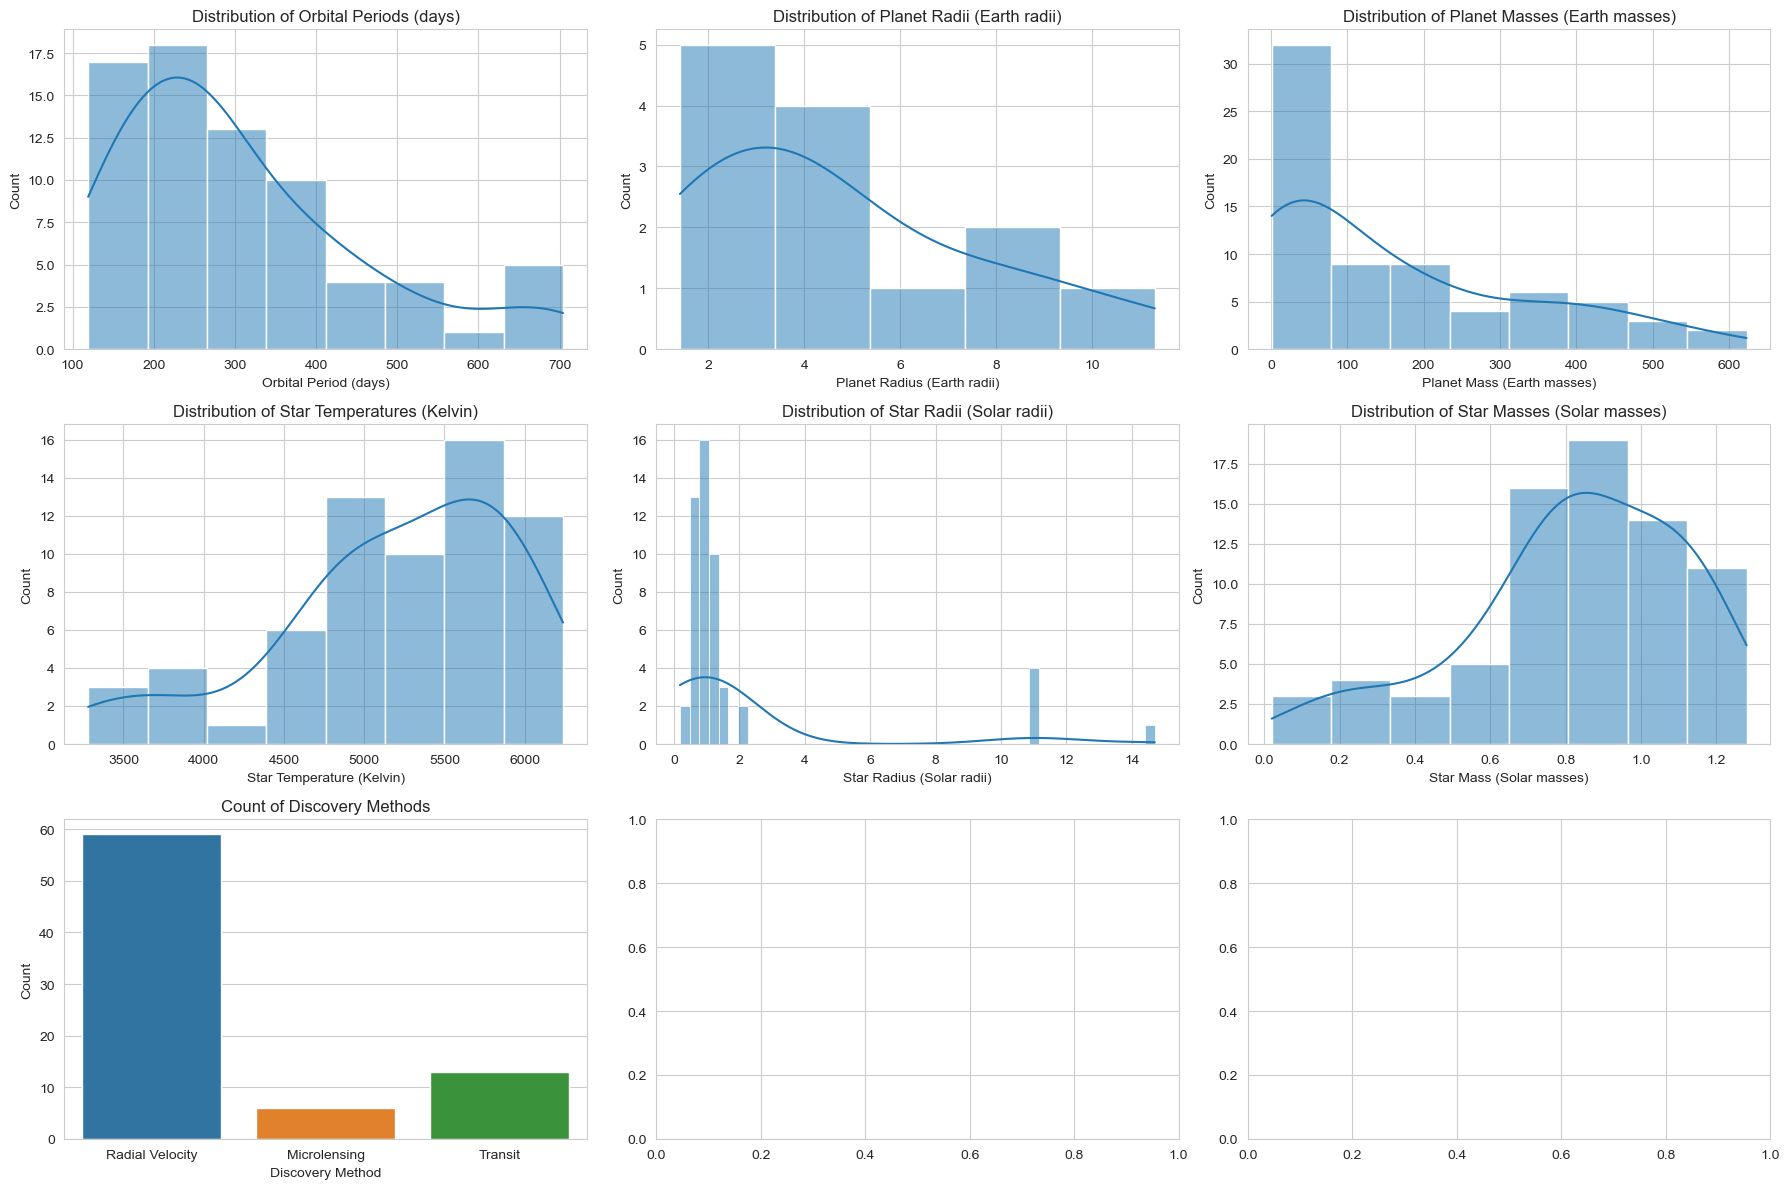

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Histograms for continuous variables
sns.histplot(data=key_exoplanet_data, x="pl_orbper", kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Orbital Periods (days)')
axes[0, 0].set_xlabel('Orbital Period (days)')
axes[0, 0].set_ylabel('Count')

sns.histplot(data=key_exoplanet_data, x="pl_rade", kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Planet Radii (Earth radii)')
axes[0, 1].set_xlabel('Planet Radius (Earth radii)')
axes[0, 1].set_ylabel('Count')

sns.histplot(data=key_exoplanet_data, x="pl_bmasse", kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Planet Masses (Earth masses)')
axes[0, 2].set_xlabel('Planet Mass (Earth masses)')
axes[0, 2].set_ylabel('Count')

sns.histplot(data=key_exoplanet_data, x="st_teff", kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Star Temperatures (Kelvin)')
axes[1, 0].set_xlabel('Star Temperature (Kelvin)')
axes[1, 0].set_ylabel('Count')

sns.histplot(data=key_exoplanet_data, x="st_rad", kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Star Radii (Solar radii)')
axes[1, 1].set_xlabel('Star Radius (Solar radii)')
axes[1, 1].set_ylabel('Count')

sns.histplot(data=key_exoplanet_data, x="st_mass", kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Star Masses (Solar masses)')
axes[1, 2].set_xlabel('Star Mass (Solar masses)')
axes[1, 2].set_ylabel('Count')

# Bar chart for categorical variable 'discoverymethod'
sns.countplot(data=key_exoplanet_data, x="discoverymethod", ax=axes[2, 0])
axes[2, 0].set_title('Count of Discovery Methods')
axes[2, 0].set_xlabel('Discovery Method')
axes[2, 0].set_ylabel('Count')

# Adjusting layout
plt.tight_layout()

# Show plot
plt.show()


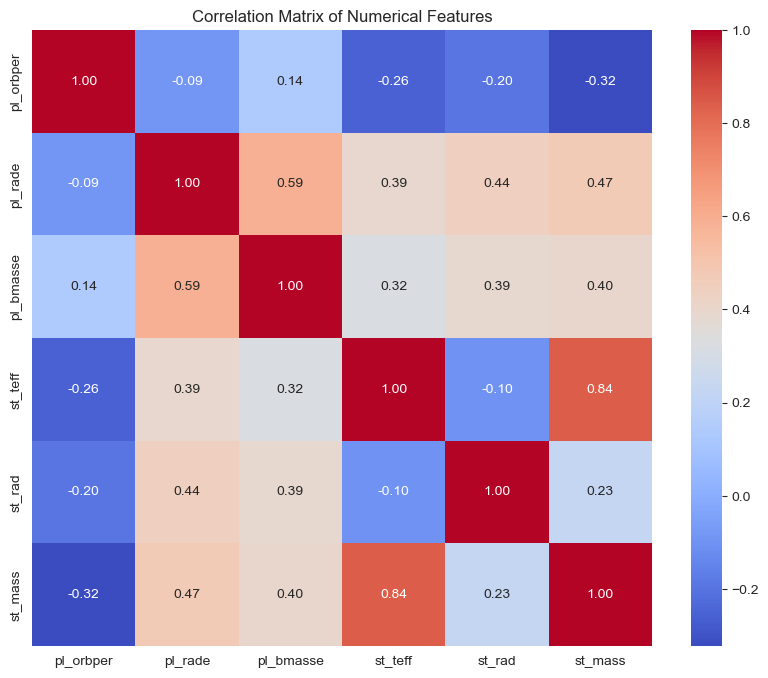

In [26]:
# Correlation analysis among numerical features
numerical_features = ["pl_orbper", "pl_rade", "pl_bmasse", "st_teff", "st_rad", "st_mass"]
correlation_matrix = key_exoplanet_data[numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()